In [1]:
import numpy as np
import geopandas as gpd
import pandas as pd

import scanpy as sc
import voyagerpy as vp
import seaborn as sns
import os
import pickle
from matplotlib.pyplot import imread
from collections import OrderedDict
import json

from matplotlib import pyplot as plt

In this notebook we will reduce the andata to minimum represntation for testing "havey" analysis

In [103]:
path_016 = "/data/kanferg/Sptial_Omics/playGround/Data/Visium_HD_Mouse_Brain_square_example/square_016um"
andata016_ = sc.read_visium(path=path_016)
andata016_

andata016_.var_names_make_unique()
sc.pp.filter_cells(andata016_, min_counts = 1000)
sc.pp.filter_cells(andata016_, min_genes = 1000)
sc.pp.filter_genes(andata016_,min_counts=1000)
#sc.pp.filter_genes(andata016_,max_counts=np.quantile(andata016_.var["n_counts"].values,q = 0.8))
andata016_.obsm['spatial'] = np.array(andata016_.obsm['spatial'], dtype=np.float64)
andata016_.uns['spatial']['img'] = andata016_.uns['spatial']["Visium_HD_Mouse_Brain"].pop("images")
andata016_.uns['spatial']['scale'] = andata016_.uns['spatial']["Visium_HD_Mouse_Brain"].pop("scalefactors")
andata016_.uns['spatial']['metadata'] = andata016_.uns['spatial']["Visium_HD_Mouse_Brain"].pop("metadata")
andata016_.uns['spatial'].pop("Visium_HD_Mouse_Brain")
andata016_

/gpfs/gsfs10/users/kanferg/conda/envs/squidpy-voyagerpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy-voyagerpy/lib/python3.8/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/gpfs/gsfs10/users/kanferg/conda/envs/squidpy-voyagerpy/lib/python3.8/site-packages/scanpy/readwrite.py:415: DtypeWarning: Columns (1,2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  positions = pd.read_csv(files["tissue_positions_file"], header=None)


AnnData object with n_obs × n_vars = 21445 × 7938
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [104]:
np.quantile(andata016_.var["n_counts"].values,q = 0.8)

6281.200000000001

In [102]:
andata016_

AnnData object with n_obs × n_vars = 21445 × 5080
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    uns: 'spatial'
    obsm: 'spatial'

In [87]:
is_mt = andata016_.var_names.str.startswith('mt')
vp.utils.add_per_cell_qcmetrics(andata016_, subsets={'mito': is_mt})
andata016_

AnnData object with n_obs × n_vars = 21445 × 7938
    obs: 'in_tissue', 'array_row', 'array_col', 'n_counts', 'n_genes', 'sum', 'detected', 'subsets_mito_sum', 'subsets_mito_detected', 'subsets_mito_percent'
    var: 'gene_ids', 'feature_types', 'genome', 'n_counts'
    uns: 'spatial'
    obsm: 'spatial'

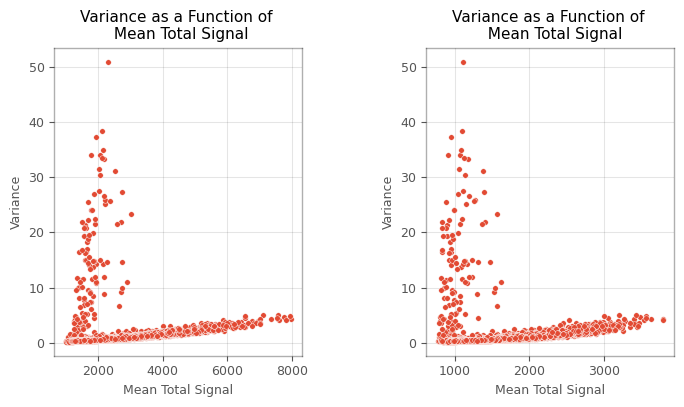

In [88]:
andata016_.obs['var'] = np.var(andata016_.X.todense(), axis=1)
gene_means = andata016_.obs['sum']
var = andata016_.obs['var']

fig, axs = plt.subplots(1, 2, figsize=(8, 4))
sns.scatterplot(x=andata016_.obs['sum'], y=andata016_.obs['var'],ax = axs[0])
sns.scatterplot(x=andata016_.obs['detected'], y=andata016_.obs['var'],ax = axs[1])

# Set plot labels and title
axs[0].set_xlabel('Mean Total Signal')
axs[0].set_ylabel('Variance')
axs[0].set_title('Variance as a Function of \n Mean Total Signal')

axs[1].set_xlabel('Mean Total Signal')
axs[1].set_ylabel('Variance')
axs[1].set_title('Variance as a Function of \n  Mean Total Signal')
plt.subplots_adjust(wspace=0.5)

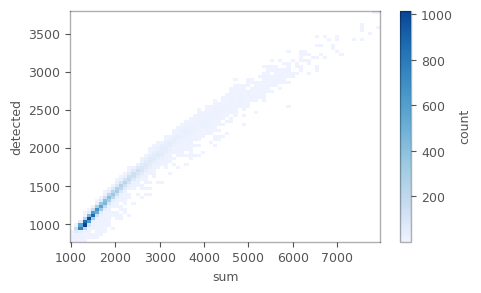

In [89]:
ax = vp.plotting.plot_barcodes_bin2d(
    andata016_,
    x='sum',
    y='detected',
    bins=76,
    figsize=(5, 3)
)


<Axes: xlabel='n_counts', ylabel='Count'>

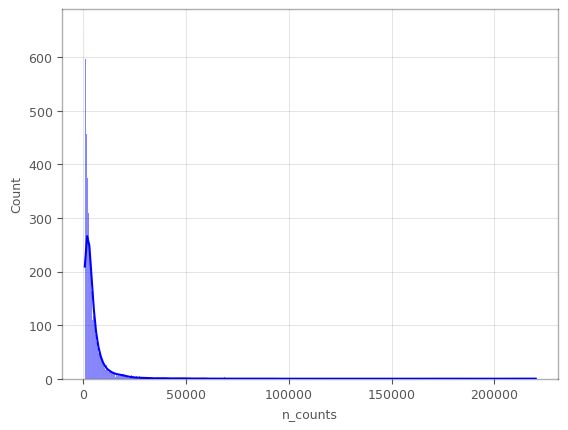

In [90]:
sns.histplot(data = andata016_.var,x = "n_counts", bins=1000, color="blue",kde=True)

In [91]:
andata016_.layers['counts'] = andata016_.X.copy()

In [93]:
andata016_.layers['logcounts'] = andata016_.X.copy()

In [94]:
spot_diameter_fullres = andata016_.uns['spatial']['scale'].pop('spot_diameter_fullres')
scale = 1
scale_dict = andata016_.uns["spatial"].get("scale", {})
spot_diam = scale_dict.get("spot_diameter_fullres")
andata016_.uns['config'] = OrderedDict()
andata016_.uns["config"]["secondary_var_names"] = andata016_.var_names
# The original count data
andata016_.layers['counts'] = andata016_.X.copy()
# Log-normalize the adata.X matrix
vp.utils.log_norm_counts(andata016_, inplace=True)
andata016_.layers['logcounts'] = andata016_.X.copy()


In [96]:
gene_var = vp.utils.model_gene_var(andata016_.layers['logcounts'], gene_names=andata016_.var_names)
gene_var

InvalidIndexError: Reindexing only valid with uniquely valued Index objects

In [98]:
np.quantile(andata016_.var["n_counts"].values,q = 0.8)

3985.2000000000007

In [ ]:
plt.scatter(x = andata016_.var['gene_ids'],